# Schleifen und Rekursion

In diesem Notebook brauchen wir wieder Turtlegrafik. Führen Sie bitte die folgenden zwei Zeilen aus, damit Sie die Turtlegrafik Kommandos zur Verfügung haben.

In [1]:
%mavenRepo shapemodelling-repo https://shapemodelling.cs.unibas.ch/repo/
%maven ch.unibas.informatik:jturtle:0.7

In [2]:
import static ch.unibas.informatik.jturtle.TurtleCommands.*;
import java.awt.Color;

### Teil 1: Schleifen

In dieser Woche haben wir Schleifen als Alternative zu Rekursion kennengelernt. 
Im ersten Teil dieses Notebooks, werden wir die verschiedenen Varianten von Schleifen anschauen und diskutieren, welche Schleifenart wir für welche Anwendung einsetzen. Zuerst greifen wir zurück, auf die Aufgabe von letzter Woche, nämlich das Zeichnen eines n-Ecks.

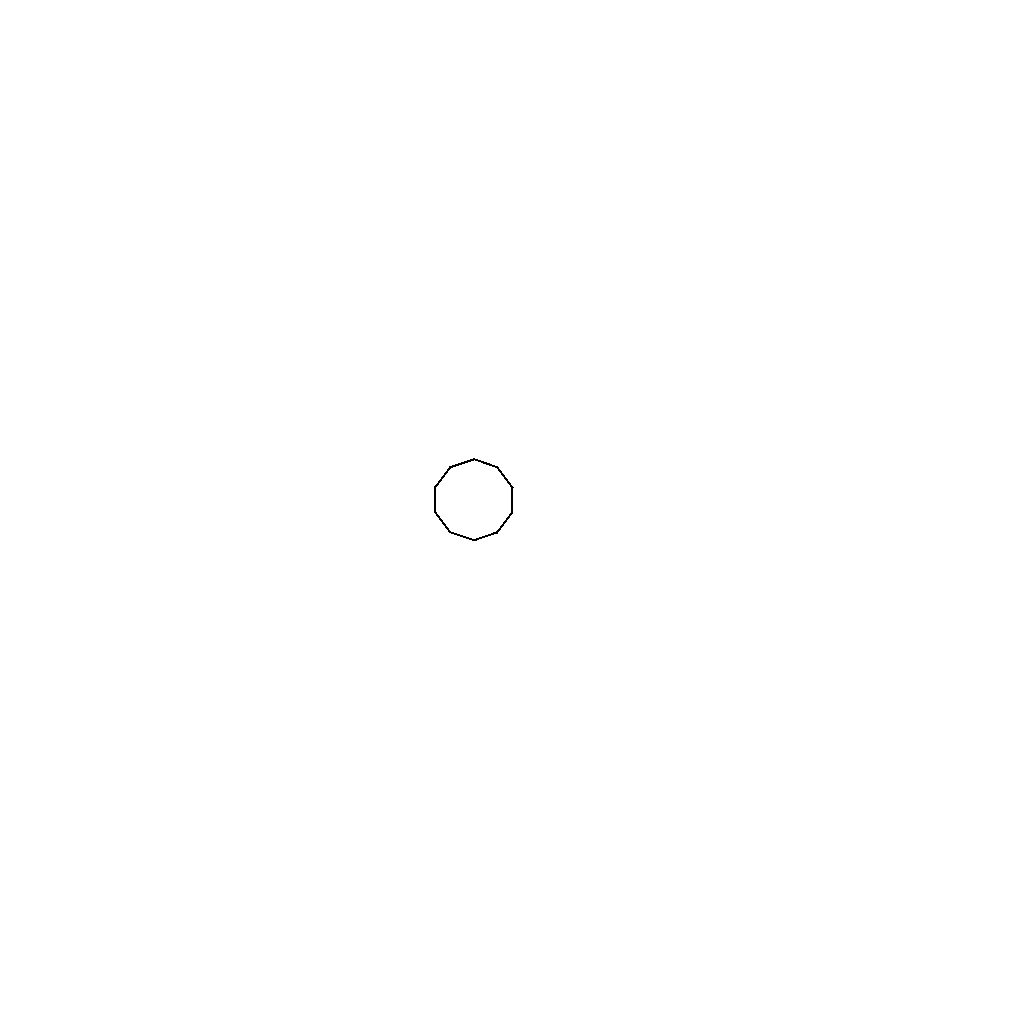

In [14]:
class Drawing {
    
    // Rekursive Lösung von letzter Woche
    public static void drawPolygon(int n, int length) {
       drawSideAndTurn(n, 360.0 / n, 20);
    }
    
    // Hilfsmethode für die rekursive Lösung von letzter Woche
    public static void drawSideAndTurn(int n, double length, double angle) {
        if (n == 0) {
            // do nothing
        } else {
            forward(length);
            turnLeft(angle);
            drawSideAndTurn(n -1, length, angle);
        }
    }
    
    public static void drawPolygonForLoop(int n, double length) {
        
        for (int i = 0; i < n; i = i + 1) {
            forward(length);
            turnLeft(360.0/n);
        }
    }

    public static void drawPolygonWhileLoop(int n, double length) {
        int i = 0;
        while (i < n) {
            forward(length);
            turnLeft(360.0 / n);
            i = i + 1;
        }
    }

    public static void drawPolygonDoWhileLoop(int n, double length) {
        // Nutzen Sie eine while-Schleife um ein n-eck zu zeichnen
        int i = 0;
        do {
            forward(length);
            turnLeft(360.0 / n);
            i = i + 1;
        } while (i < n);
    }

    
    public static void main(String[] args) {
        home();
        reset();
        clear();
        penDown();
        drawPolygonDoWhileLoop(10, 5);
        display(drawing());
    }
}

Drawing.main(new String[0]);

#### Miniübungen

* Implemntieren Sie die Funktionalität zum Zeichnen eines n-Ecks, indem Sie einmal eine for-Schleife, einmal eine while-Schleife und einmal eine do-while Schleife nutzen. 
* Welche Lösung würden Sie bevorzugen?
* Sind alle Lösungen korrekt?

#### Spirale

Als nächsten möchten wir eine Spiralmuster zeichnen. Dies machen wir, indem wir uns in einer Schleife jeweils um denselben Winkel drehen und dann ein Stück vorwärts gehen. Das Stück, welches wir vorwärts gehen, wird in jedem Schritt etwas grösser. Wir beginnen mit einer initialen Schrittlänge, und brechen ab, wenn wir eine gewisse Schrittlänge erreicht haben. 

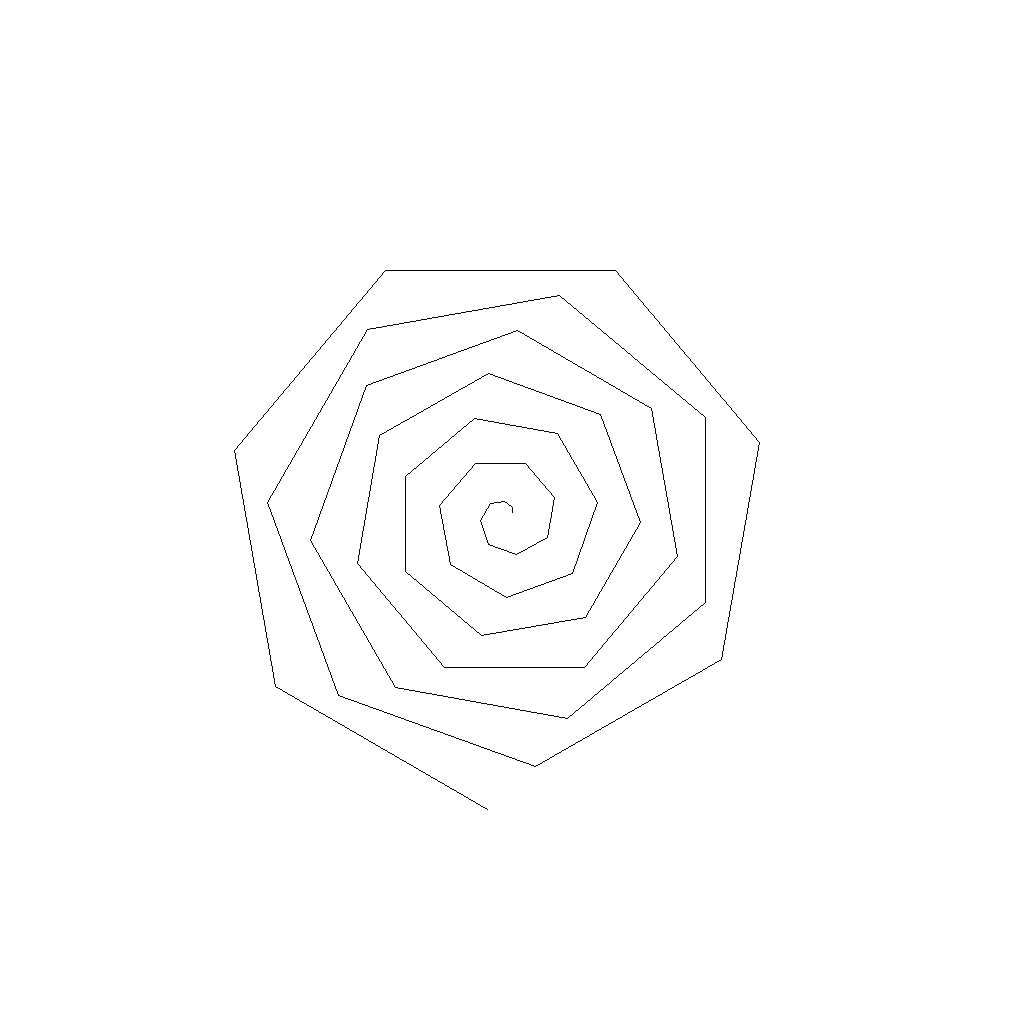

In [23]:
class Drawing {
    
    public static void drawSpiral(double initialLength, double finalLength) {
        penDown();
       
        double length = initialLength;
        while (length < finalLength) {
            forward(length);
            turnLeft(50);
            length = length + 1;
        }
    }
    
   
    public static void drawSpiralRec(double currentLength, double finalLength) {
        penDown();
       
        if (currentLength >= finalLength) {
            return;
        } else {
        
            forward(currentLength);
            turnLeft(50);
            drawSpiralRec(currentLength + 1, finalLength);
        }
    }
    
    public static void main(String[] args) {
        home();
        reset();
        penSize(1);
        clear();
        penDown();
        
        drawSpiralRec(1, 50);
        display(drawing());
    }
}

Drawing.main(new String[0]);

#### Miniübung 

* Implementieren Sie die Methode `drawSpiral`. 
* Welche Schleife nehmen Sie hier bevorzugt?
* Für ganz Schnelle: Können Sie die Methode auch rekursiv schreiben?

### Eingabe mittels Scanner

Zum Schluss zeigen wir noch ein Beispiel, bei dem die do-While Schleife die bevorzugte Wahl ist. 
Diese Schleife ist immer dann nützlich, wenn wir eine Aktion mindestens einmal durchführen müssen, bevor wir Entscheiden können, ob ein weiterer Durchlauf gemacht werden soll. Das typische Beispiel dafür ist das Lesen von Daten aus einer Datei oder der Tastatur. Dies wird in folgendem Beispiel gezeigt:

In [6]:
import java.util.Scanner;  // Import the Scanner class

class Input {

     public static void main(String[] args) {
         String userName = "" ;
        do {
            Scanner myObj = new Scanner(System.in);  // Create a Scanner object
            System.out.println("Enter your name");

             userName = myObj.nextLine();  // Read user input
            if (!userName.equals(""))  {
                System.out.println("Username is: " + userName);  // Output user input
            }
        } while (!userName.equals(""));
  }
}

Input.main(new String[0]);

Enter your name
abc
Username is: abc
Enter your name



#### Miniübung 

* Schreiben Sie dieses Beispiel so um, dass eine while-Schleife verwendet wird. 

### Teil 2: Rekursion



Angenommen Sie wollen eine Methode schreiben, die die Zahlen von $0$ bis $n$ aufsummiert und das Resultat zurückgibt. Mit einer for-Schleife ist diese Aufgabe sehr einfach zu lösen (siehe Methode `sumNumbers` in Zelle unten). Dasselbe können wir aber auch mittels Rekursion machen. Der Schlüssel zur Lösung gibt die folgende Einsicht

- Die Summe der Zahlen von $m$ bis $n$ ist gleich $m$ plus der Summe von $m+1$ bis $n$, oder in Formeln
$ \sum_{i=m}^n i = m + \sum_{i=m+1}^n i$

#### Miniübung

* Was wäre das Abbruchkriterium für die Rekursion?
* Implementieren Sie diese Strategie.

In [26]:
class SumExample {

    public static int sumNumbers(int from, int to) {
        int sum = 0;
        for (int i = from; i <= to; i = i + 1) {
            sum = sum + i;
        }
        return sum;
    }

    public static int sumNumbersRec(int from, int to) {
        if (from > to) {
            return 0;
        }
        return from + sumNumbersRec(from + 1, to);
        
    }


    public static void main(String[] args) {
        int sum = sumNumbersRec(0, 100);
        System.out.println("sum of the numbers 0 to 100: " +sum);
    }
}
SumExample.main(new String[0]);

sum of the numbers 0 to 100: 5050


### Die Ästhetik der Informatik

Inzwischen können Sie auch schon die Zeichnung des Baums verstehen, welche wir Ihnen am Anfang der Vorlesung gezeigt haben. Diese nutzt einfach die Idee, dass ein Baum wieder aus kleinen Teilbäumen besteht. 

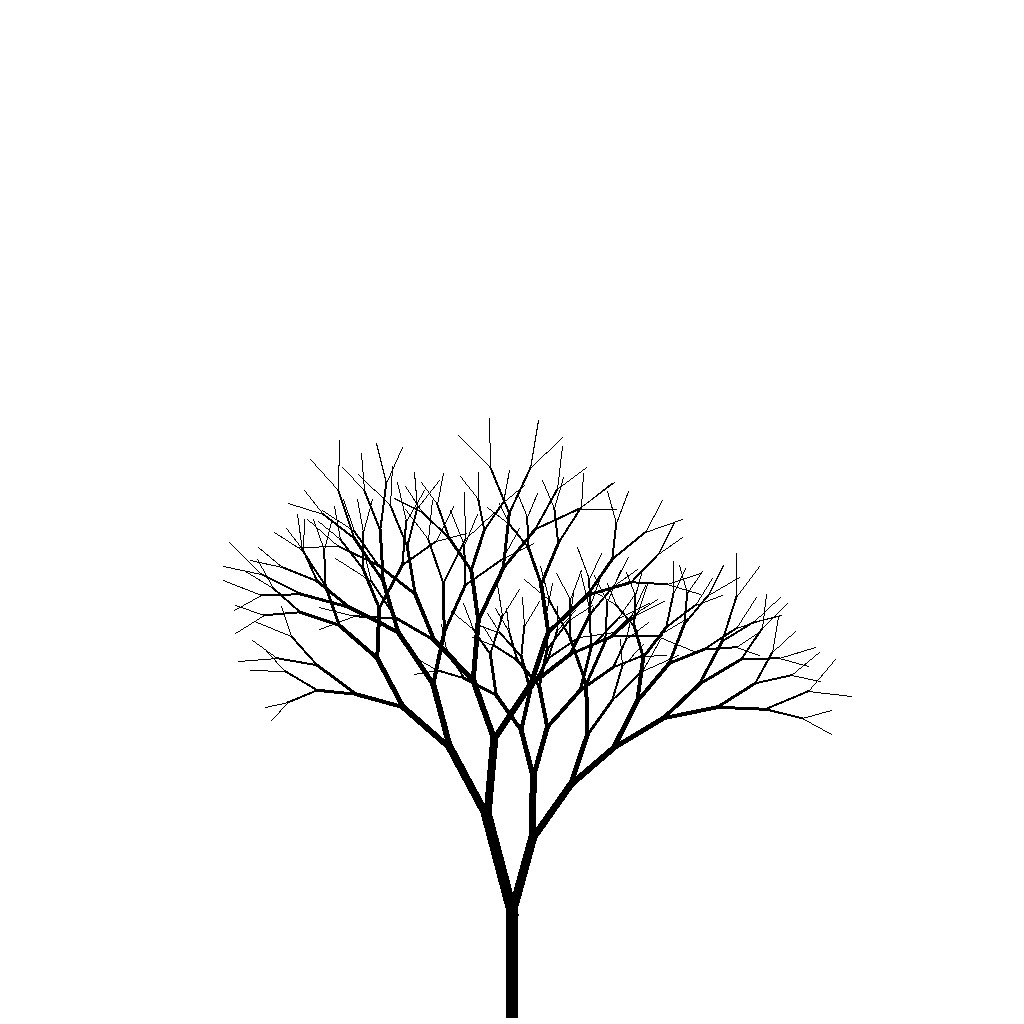

In [44]:
import java.util.Random;
class RandomTree {
    
    static Random random = new Random();
    
    static void randomTree(double length, double minLength, int thickness, int minThickness, double minAngle, double maxAngle, double minShrink, double maxShrink) {
        if (length < minLength || thickness < minThickness) {
            return;
        } else {
             double angle1 = minAngle + random.nextDouble() * (maxAngle - minAngle);
             double angle2 = minAngle + random.nextDouble() * (maxAngle - minAngle);
             double shrink1 = minShrink + random.nextDouble() * (maxShrink - minShrink);
             double shrink2 = minShrink + random.nextDouble() * (maxShrink - minShrink);
             penSize(thickness);
             forward(length);
             turnRight(angle1);
             randomTree(length*shrink1, minLength, (int) (thickness * shrink1),  minThickness, minAngle, maxAngle, minShrink, maxShrink);
             turnLeft(angle1 + angle2);         
             randomTree(length*shrink2, minLength, (int) (thickness * shrink2), minThickness, minAngle, maxAngle, minShrink, maxShrink);
             turnRight(angle2);
             penSize(thickness);
             backward(length);
  
        }
    }
    
    static void drawTree(double length, double minLength, int thickness, int minThickness, double minAngle, double maxAngle, double minShrink, double maxShrink) {
        clear();
        reset();
        penUp();
        turnRight(180);
        forward(100);
        turnRight(180);
        penColor(java.awt.Color.BLACK);
        penDown();
        RandomTree.randomTree(length, minLength, thickness, minThickness, minAngle, maxAngle, minShrink, maxShrink);
        display(drawing());
    }
    
    
     public static void main(String[] args) {
        RandomTree.drawTree(20, 2, 12, 1, 10, 30, 0.75, 1.0);
    }
};
RandomTree.main(new String[0]);

#### Miniübungen

Versuchen Sie folgendes herauszufinden
* Was macht `random.nextDouble`?
    * Was passiert, wenn Sie stattdessen jeweils 0.5 einsetzen?
* Was ist das Abbruchkriterium?
* Wie sieht ein Teilbaum aus?
* Wieviele und welche rekursive Aufrufe werden jeweils gemacht?
